In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import math
import time
from scipy.integrate import *
from scipy.sparse.linalg import spsolve

from matplotlib import cm
from scipy.optimize import fsolve
from scipy.optimize import curve_fit
import pripomocki.diffeq_2 as deq

import matplotlib
from cmath import *
from mpl_toolkits.mplot3d import Axes3D

# PADAJOČA VRV
## Zaključna naloga za ma-fi 2

### Formulacija problema
Desni konec vrvi naj bo fiksiran na visini $h_0 = 0$, lahko pa se prosto vrti

Levi konec je na zacetku na visini $h$ in ob casu $t = 0$ zacne padati

### Za zacetek samo 'viseci most'

In [5]:
P0 = np.array((0.0, 0.0))   # levo sidrisce
P1 = np.array((5.0, 1.0))   # desno sidrisce
L = 6    # dolzina vrvi
m = 3    # dolzinska gostota mase
g = 1   #teznostni pospesek
t = 10


d = abs(P0[0] - P1[0])
h = abs(P0[1] - P1[1])

if L <= np.sqrt(d**2 + h**2):
    print('Prekratka vrv')
else:
    pass


def catenary(a):
    return a * np.sinh(d/(2*a) + np.arctanh(h/L)) + a * np.sinh(d/(2*a) - np.arctanh(h/L)) - L

a = fsolve(catenary, 1) # najdemo tapravo krivuljo
print(f'a =', a)

d1 = a * (d/(2*a) + np.arctanh(h/L))
d0 = d - d1

if P1[1] >= P0[1]:
    xi = d0
    xf = d1

elif P1[1] < P0[1]:
    xi = d1
    xf = d0


x = np.linspace(-xi, xf, 500)
y = np.zeros_like(x)

y = a * np.cosh((x)/a)

h_max = a * (math.cosh(d1 / a) - 1)
print(h_max)

y = y - y[0]

a = [2.44735963]
[1.94631469]


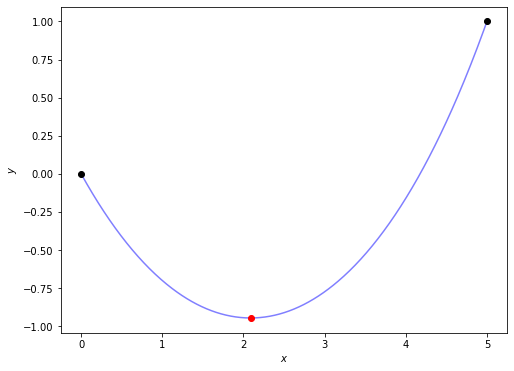

In [6]:
t = np.linspace(0, 10, 500)
cmap = plt.get_cmap('cool', len(t))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)

axes.plot(x+xi, y, color=cmap(250))
axes.set_ylabel('$y$')

axes.plot(P0[0], P0[1], color='black', marker='o')
axes.plot(P1[0], P1[1], color='black', marker='o')
axes.plot(xi, max(P1[1], P0[1])-h_max, color='red', marker='o')

plt.xlabel('$x$')

plt.show()

##### Testiranje vseh robnih pogojev (nategnjen, vodoravno, vertikalno ...)

a = [2.44735963]
a = [2.37310042]
a = [2.30564856]
a = [2.24403303]
a = [2.18746585]
a = [2.13529999]
a = [2.08699858]
a = [2.04211192]
a = [2.00026009]
a = [1.96111969]
a = [1.9244134]
a = [1.88990193]
a = [1.85737759]
a = [1.82665906]
a = [1.79758731]
a = [1.77002217]
a = [1.74383954]
a = [1.71892913]
a = [1.69519254]
a = [1.67254164]
a = [1.65089726]
a = [1.63018805]
a = [1.6103495]
a = [1.59132315]
a = [1.57305585]
a = [1.55549917]
a = [1.53860889]
a = [1.52234451]
a = [1.50666889]
a = [1.49154788]
a = [1.47695002]
a = [1.46284629]
a = [1.44920984]
a = [1.43601585]
a = [1.42324125]
a = [1.41086462]
a = [1.39886606]
a = [1.387227]
a = [1.37593012]
a = [1.36495924]
a = [1.35429922]
a = [1.34393588]
a = [1.33385594]
a = [1.32404692]
a = [1.31449708]
a = [1.30519538]
a = [1.29613145]
a = [1.28729547]
a = [1.27867821]
a = [1.27027092]
a = [1.26206536]
a = [1.25405372]
a = [1.24622859]
a = [1.23858297]
a = [1.23111019]
a = [1.22380396]
a = [1.21665828]
a = [1.20966743]
a = [1.20282601]
a

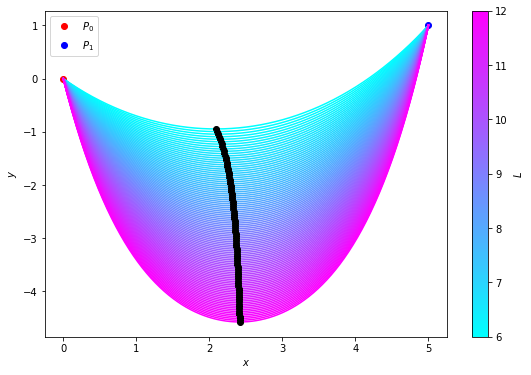

In [7]:
def stojeca_vrv(P0, P1, Lspace, m=3, g=1):


    d = abs(P0[0] - P1[0])
    h = abs(P0[1] - P1[1])

    for L in Lspace:
        if L < np.sqrt(d**2 + h**2):
            print('Prekratka vrv')
        else:
            pass

    y = np.zeros([len(Lspace), 500])
    h_max = np.zeros(len(Lspace))
    zamik = np.zeros(len(Lspace))

    for i in range(len(Lspace)):
        L = Lspace[i]

        def catenary(a):
            return a * np.sinh(d/(2*a) + np.arctanh(h/L)) + a * np.sinh(d/(2*a) - np.arctanh(h/L)) - L

        a = fsolve(catenary, 1) # najdemo tapravo krivuljo
        print(f'a =', a)

        d1 = a * (d/(2*a) + np.arctanh(h/L))
        d0 = d - d1

        if P1[1] >= P0[1]:
            xi = d0

        elif P1[1] < P0[1]:
            xi = d1



        x = np.linspace(P0[0], P1[0], 500)
    

        y[i] = a * np.cosh((x-xi)/a)

        h_max[i] = a * np.cosh(d1 / a) - a
        zamik[i] = xi

        y[i] = y[i] - y[i][0]


    cmap = plt.get_cmap('cool', len(Lspace))
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 6), sharex=True)

    axes.set_ylabel('$y$')

    axes.plot(P0[0], P0[1], color='red', marker='o', label=r'$P_0$', linestyle='')
    axes.plot(P1[0], P1[1], color='blue', marker='o', label=r'$P_1$', linestyle='')
    

    for i in range(len(Lspace)):
        axes.plot(x, y[i], color=cmap(i))
        axes.plot(zamik[i], max(P1[1], P0[1])-h_max[i], color='black', marker='o')

    norm = matplotlib.colors.Normalize(vmin=Lspace[0], vmax=Lspace[-1])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=axes, label=r'$L$')

    plt.xlabel('$x$')
    plt.legend()

    plt.savefig(f'grafi/catenary-L{Lspace[0]}-{Lspace[-1]}-P0{P0[0]}-{P0[1]}-P1{P1[0]}-{P1[1]}.pdf')
    plt.show()


P0 = np.array([0.0, 0.0])
P1 = np.array([5.0, 1.0])
Lspace = np.linspace(6, 12, 100)


stojeca_vrv(P0, P1, Lspace)

### Spustimo da desni konec pada

a = [2.44735963]
[1.94631469]
dolzina: 5.999999661238805
dolzina: 6.000000537837244
dolzina: 6.00000548108304
dolzina: 6.000018414066856
dolzina: 6.000044131274408
dolzina: 6.0000881181214725
dolzina: 6.000156386235211
dolzina: 6.000255321000557
dolzina: 6.0003915387131
dolzina: 6.000571751557377
dolzina: 6.000802639514868
dolzina: 6.001090729151433
dolzina: 6.001442279987481
dolzina: 6.001863179762639
dolzina: 6.002358850320207
dolzina: 6.0029341660174875
dolzina: 6.003593386497791
dolzina: 6.0043401053463334
dolzina: 6.005177215631173
dolzina: 6.006106892662652
dolzina: 6.007130593568592
dolzina: 6.008249072561238
dolzina: 6.009462410142367
dolzina: 6.010770054013954
dolzina: 6.012170869167672
dolzina: 6.013663194525401
dolzina: 6.015244903578902
dolzina: 6.016913466697194
dolzina: 6.018666013091904
dolzina: 6.020499390809476
dolzina: 6.022410223513784
dolzina: 6.024394963200493
dolzina: 6.026449938322535
dolzina: 6.028571397090479
dolzina: 6.03075554593727
dolzina: 6.032998583304852

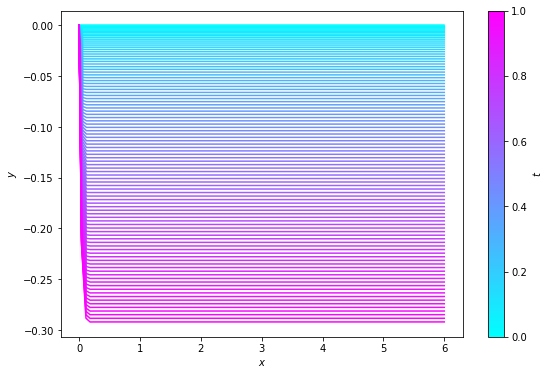

In [8]:
P0 = np.array((0.0, 0.0))   # levo sidrisce
P1 = np.array((5.0, 1.0))   # desno sidrisce
L = 6    # dolzina vrvi
m = 3    # dolzinska gostota mase
g = 1   #teznostni pospesek


d = abs(P0[0] - P1[0])
h = abs(P0[1] - P1[1])

if L <= np.sqrt(d**2 + h**2):
    print('Prekratka vrv')
else:
    pass


def catenary(a):
    return a * np.sinh(d/(2*a) + np.arctanh(h/L)) + a * np.sinh(d/(2*a) - np.arctanh(h/L)) - L

a = fsolve(catenary, 1) # najdemo tapravo krivuljo
print(f'a =', a)

d1 = a * (d/(2*a) + np.arctanh(h/L))
d0 = d - d1

if P1[1] >= P0[1]:
    xi = d0
    xf = d1

elif P1[1] < P0[1]:
    xi = d1
    xf = d0


x = np.linspace(-xi, xf, 500)
y = np.zeros_like(x)

y = a * np.cosh((x)/a)

h_max = a * (math.cosh(d1 / a) - 1) # Najnizja tocka
print(h_max)

Fx = m * a   # Napetost v horizontalni smeri ... konstantna cez cel strik
Fy = m * np.sinh(x)   # Napetsot v vertikalni smeri ... integral po striku v obe smeri od najniyje tocke


y = y - y[0]    # Vzpostavljeni zacetni pogoji y(x)




def premik_vrv(x, t):   # x oblike [x, y]
    return np.array([x[1], x])


n = 100  # Razclenitev strika na n tock, potem premikanje strika kot funkjcija najblizjih sosedov. Probam to catenary funkcijo reaclenit cim bolj enakomerno

tspace = np.linspace(0, 1, 100)
strik_x = np.zeros([len(tspace), n])
strik_y = np.zeros_like(strik_x)


l = L / n   # zeljena dolzina enega segmenta

strik1_x = np.zeros(n)
strik1_y = np.zeros(n)
strik2_x = np.zeros(n)
strik2_y = np.zeros(n)
velocity_x = np.zeros(n)
velocity_y = np.zeros(n)

beta = 0.95
gamma = 0.001

strik1_x = np.linspace(0, L, n)
strik1_y = np.zeros(n)

for i in range(len(tspace)):
    t = tspace[i]

    for j in range(n):
        if j == 0:
            strik2_x[j] = strik1_x[j]
            strik2_y[j] = strik1_x[j]
            velocity_x[j] = 0
            velocity_y[j] = 0
            '''

            vec2_x = strik1_x[j+1] - strik1_x[j]
            vec2_y = strik1_y[j+1] - strik1_y[j]
            d2 = np.sqrt(vec2_x**2 + vec2_y**2)
            e2 = d2 - l


            vx = vec2_x / d2
            vy = vec2_y / d2 - l * m

            velocity_x[j] = velocity_x[j] * beta + vx * gamma
            velocity_y[j] = velocity_y[j] * beta + vy * gamma

            strik2_x[j] = strik1_x[j] + velocity_x[j]
            strik2_y[j] = strik1_y[j] + velocity_y[j]'''


        elif j == n-1:
            vec1_x = strik1_x[j-1] - strik1_x[j]
            vec1_y = strik1_y[j-1] - strik1_y[j]
            d1 = np.sqrt(vec1_x**2 + vec1_y**2)
            e1 = d1 - l

            vx = vec1_x / d1 * e1
            vy = vec1_y / d1 * e1 - l * m

            velocity_x[j] = velocity_x[j] * beta + vx * gamma
            velocity_y[j] = velocity_y[j] * beta + vy * gamma

            strik2_x[j] = strik1_x[j] + velocity_x[j]
            strik2_y[j] = strik1_y[j] + velocity_y[j]


        else:
            vec1_x = strik1_x[j-1] - strik1_x[j]
            vec1_y = strik1_y[j-1] - strik1_y[j]
            d1 = np.sqrt(vec1_x**2 + vec1_y**2)
            e1 = d1 - l

            vec2_x = strik1_x[j+1] - strik1_x[j]
            vec2_y = strik1_y[j+1] - strik1_y[j]
            d2 = np.sqrt(vec2_x**2 + vec2_y**2)
            e2 = d2 - l


            vx = vec1_x / d1 * e1 + vec2_x / d2 * e2
            vy = vec1_y / d1 * e1 + vec2_y / d2 * e2 - l * m

            velocity_x[j] = velocity_x[j] * beta + vx * gamma
            velocity_y[j] = velocity_y[j] * beta + vy * gamma

            strik2_x[j] = strik1_x[j] + velocity_x[j]
            strik2_y[j] = strik1_y[j] + velocity_y[j]

    strik_x[i] = strik1_x
    strik_y[i] = strik1_y

    strik1_x = strik2_x
    strik1_y = strik2_y

    dolzina = 0
    for k in range(n-1):
        dx = abs(strik1_x[k] - strik1_x[k+1])
        dy = abs(strik1_y[k] - strik1_y[k+1])
        dolzina += np.sqrt(dx**2 + dy**2)
    print(f'dolzina:', dolzina)


cmap = plt.get_cmap('cool', len(tspace))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 6), sharex=True)

axes.set_ylabel('$y$')

#axes.plot(P0[0], P0[1], color='black', marker='o')
#axes.plot(P1[0], P1[1], color='black', marker='o')


for i in range(len(tspace)):
    axes.plot(strik_x[i], strik_y[i], color=cmap(i))
    #axes.plot(zamik[i], max(P1[1], P0[1])-h_max[i], color='red', marker='o')

norm = matplotlib.colors.Normalize(vmin=tspace[0], vmax=tspace[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label=r'$t$')

plt.xlabel('$x$')

plt.show()

    

#### Poskus z metodo runge-kutta 4. reda

enacba: $\sum_{j=1}^n m_{ij}c_{ij}\ddot{\varphi}_j + \sum_{j=1}^n m_{ij}s_{ij}\dot{\varphi_j}^2 + \frac{g}{l}q_ic_i$ = 0

In [9]:
from scipy.integrate import Radau
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp

def M(n):
    M = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            if i == j:
                M[i, j] = n-i + 1/3
            else:
                M[i, j] = n-max(i, j) + 1/2
    return M


def MC(phi):
    n = len(phi)
    m = M(n)
    C = np.zeros_like(m)
    MC = np.zeros_like(m)
    for i in range(n):
        for j in range(n):
            C[i, j] = np.cos(phi[i]-phi[j])
            MC[i, j] = m[i, j] * C[i, j]
    return MC


def MS(phi):
    n = len(phi)
    m = M(n)
    C = np.zeros_like(m)
    MS = np.zeros_like(m)
    for i in range(n):
        for j in range(n):
            C[i, j] = np.sin(phi[i]-phi[j])
            MS[i, j] = m[i, j] * C[i, j]
    return MS


def qc(phi):
    n = len(phi)
    q = np.zeros_like(phi)
    for i in range(n):
        q[i] = (n - i + 0.5) * np.cos(phi[i])
    return q


def casovni_razvoj(t, omega):
    phi = sol[0, t]
    n = len(phi)
    mc = MC(phi)
    ms = MS(phi)
    q = qc(phi)

    inv = np.linalg.inv(mc)

    return - np.dot(inv, np.dot(ms, np.square(omega))) - np.dot(inv, q)



phi = np.zeros(25)
omega = np.zeros_like(phi)
alpha = np.zeros_like(phi)

timespace = np.linspace(0, 10, 1000)

sol = np.zeros([3, len(timespace), len(phi)])
sol[0, 0] = phi
sol[1, 0] = omega
sol[2, 0] = alpha


for t in range(len(timespace)-1):
    dt = timespace[t+1] - timespace[t]

    sol[0, t+1] = sol[0, t] + sol[1, t] * dt
    
    k1 = dt * casovni_razvoj(t, sol[1, t])
    k2 = dt * casovni_razvoj(t, sol[1, t] + 0.5 * k1)
    k3 = dt * casovni_razvoj(t+1, sol[1, t] + 0.5 * k2)
    k4 = dt * casovni_razvoj(t+1, sol[1, t] + k3)

    sol[1, t+1] = sol[1, t] + (k1 + 2.0 * (k2+k3) + k4) / 6.0

    sol[2, t+1] = (sol[1, t+1] - sol[1, t]) / dt

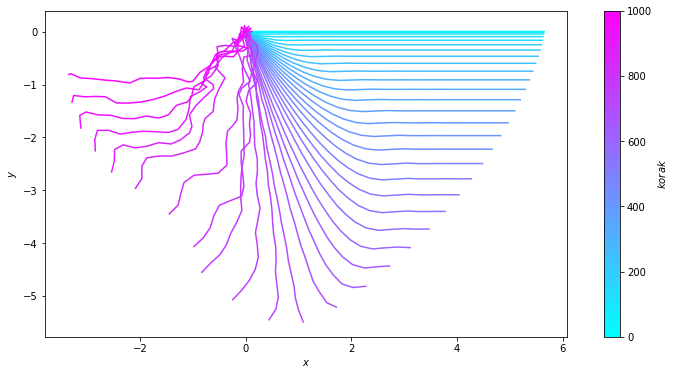

In [10]:
def x_iz_phi(phi, L):
    n = len(phi)
    l = L / n
    x = np.zeros(len(phi)+1)
    for i in range(n):
        x[i+1] = 0.5 * l * np.cos(phi[i])
        for j in range(1, i):
            x[i+1] += l * np.cos(phi[j])
    return x

def y_iz_phi(phi, L):
    n = len(phi)
    l = L / n
    y = np.zeros(len(phi)+1)
    for i in range(n):
        y[i+1] = 0.5 * l * np.sin(phi[i])
        for j in range(1, i):
            y[i+1] += l * np.sin(phi[j])
    return y

t = len(sol[0])

cmap = plt.get_cmap('cool', t)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(13, 6), sharex=True)

axes.set_ylabel('$y$')

#axes.plot(P0[0], P0[1], color='red', marker='o', label=r'$P_0$', linestyle='')
#axes.plot(P1[0], P1[1], color='blue', marker='o', label=r'$P_1$', linestyle='')

freq = 25

for i in range(t//freq):
    x = x_iz_phi(sol[0, freq*i], L)
    y = y_iz_phi(sol[0, freq*i], L)
    axes.plot(x, y, color=cmap(freq*i))

norm = matplotlib.colors.Normalize(vmin=0, vmax=t)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label=r'$korak$')

plt.xlabel('$x$')
#plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig(f'grafi/padvrv-n{len(phi)}-l{L/len(phi)}-dt{round(timespace[1]-timespace[0], 2)}-t{timespace[-1]}-freq{freq}.pdf')
plt.show()

#### Dodaten popravek da se strik leps obnasa

enacba: $\sum_{j=1}^n m_{ij}c_{ij}\ddot{\varphi}_j + \sum_{j=1}^n m_{ij}s_{ij}\dot{\varphi_j}^2 + \frac{g}{l}q_ic_i - \frac{r}{ml^2}(\dot{\varphi}_{i+1} - 2\dot{\varphi}_i + \dot{\varphi}_{i-1})= 0$

In [11]:
def casovni_razvoj_popravek(t, omega):
    phi = sol2[0, t]
    n = len(phi)
    l = L / n
    mc = MC(phi)
    ms = MS(phi)
    q = qc(phi)

    inv = np.linalg.inv(mc)
    
    res = - np.dot(inv, np.dot(ms, np.square(omega))) - np.dot(inv, q)

    popravek = np.zeros_like(phi)
    for i in range(n):
        if i == 0:
            popravek[i] = r / (m*l**2) * (omega[i+1] - 2 * omega[i] + omega[i])
        elif i == n-1:
            popravek[i] = r / (m*l**2) * (omega[i] - 2 * omega[i] + omega[i-1])
        else:
            popravek[i] = r / (m*l**2) * (omega[i+1] - 2 * omega[i] + omega[i-1])

    return res + np.dot(inv, popravek)


phi_p = np.zeros(50)
'''for i in range(len(phi_p)):
    if i < len(phi_p)//2:
        phi_p[i] = -np.pi / 2.0
    else:
        phi_p[i] = np.pi / 2.0'''


omega_p = np.zeros_like(phi_p)
alpha_p = np.zeros_like(phi_p)
m = 0.2
L = 6
r = 0.001
t_final = 10

timespace_p = np.linspace(0, t_final, 100*t_final)

sol2 = np.zeros([3, len(timespace_p), len(phi_p)])
sol2[0, 0] = phi_p
sol2[1, 0] = omega_p
sol2[2, 0] = alpha_p


for t in range(len(timespace_p)-1):
    dt = timespace_p[t+1] - timespace_p[t]

    sol2[0, t+1] = sol2[0, t] + sol2[1, t] * dt
    
    k1 = dt * casovni_razvoj_popravek(t, sol2[1, t])
    k2 = dt * casovni_razvoj_popravek(t, sol2[1, t] + 0.5 * k1)
    k3 = dt * casovni_razvoj_popravek(t+1, sol2[1, t] + 0.5 * k2)
    k4 = dt * casovni_razvoj_popravek(t+1, sol2[1, t] + k3)

    sol2[1, t+1] = sol2[1, t] + (k1 + 2.0 * (k2+k3) + k4) / 6.0

    sol2[2, t+1] = (sol2[1, t+1] - sol2[1, t]) / dt

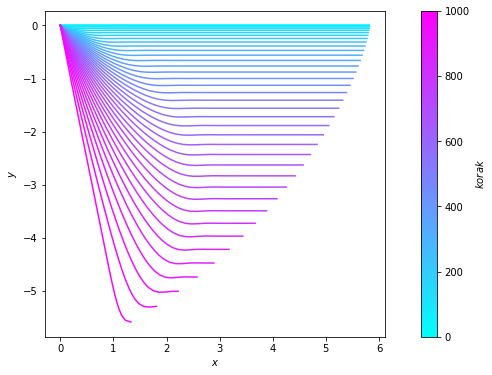

grafi/padvrv-popR-n50-l0.12-m0.2-r0.001-dt0.01-t10.0-freq25.pdf


In [12]:
t = len(sol2[0])

cmap = plt.get_cmap('cool', t)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(13, 6), sharex=True)

axes.set_ylabel('$y$')

#axes.plot(P0[0], P0[1], color='red', marker='o', label=r'$P_0$', linestyle='')
#axes.plot(P1[0], P1[1], color='blue', marker='o', label=r'$P_1$', linestyle='')

freq = 25

for i in range(t//freq):
    x = x_iz_phi(sol2[0, freq*i], L)
    y = y_iz_phi(sol2[0, freq*i], L)
    axes.plot(x, y, color=cmap(freq*i))

norm = matplotlib.colors.Normalize(vmin=0, vmax=t)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label=r'$korak$')

plt.xlabel('$x$')
#plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig(f'grafi/padvrv-popR-n{len(phi_p)}-l{round(L/len(phi_p), 2)}-m{m}-r{r}-dt{round(timespace_p[1]-timespace_p[0], 2)}-t{timespace_p[-1]}-freq{freq}.pdf')
plt.show()
print(f'grafi/padvrv-popR-n{len(phi_p)}-l{round(L/len(phi_p), 2)}-m{m}-r{r}-dt{round(timespace_p[1]-timespace_p[0], 2)}-t{timespace_p[-1]}-freq{freq}.pdf')

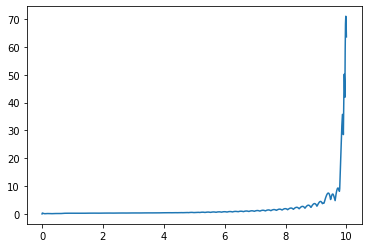

In [13]:
amax = np.zeros_like(timespace_p)
vmax = np.zeros_like(timespace_p)
for i in range(len(amax)):
    amax[i] = max(sol2[2, i])
    vmax[i] = max(sol2[1, i])


plt.plot(timespace_p, amax)
#plt.plot(timespace_p, vmax)
plt.show()

#### Catenary --> $\varphi_i$

a = [2.44735963]
[1.94631469]


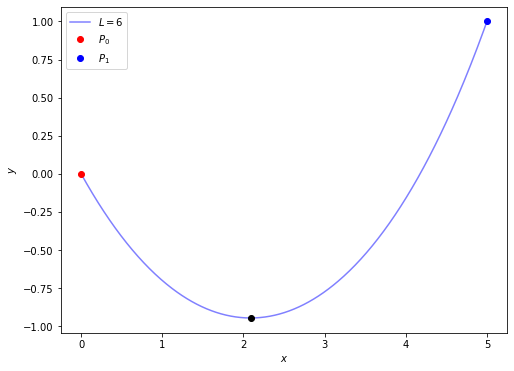

In [14]:
P0 = np.array((0.0, 0.0))   # levo sidrisce
P1 = np.array((5.0, 1.0))   # desno sidrisce
L = 6    # dolzina vrvi
m = 3    # dolzinska gostota mase
g = 1   #teznostni pospesek


d = abs(P0[0] - P1[0])
h = abs(P0[1] - P1[1])

if L <= np.sqrt(d**2 + h**2):
    print('Prekratka vrv')
else:
    pass


def catenary(a):
    return a * np.sinh(d/(2*a) + np.arctanh(h/L)) + a * np.sinh(d/(2*a) - np.arctanh(h/L)) - L

a = fsolve(catenary, 1) # najdemo tapravo krivuljo
print(f'a =', a)

d1 = a * (d/(2*a) + np.arctanh(h/L))
d0 = d - d1

if P1[1] >= P0[1]:
    xi = d0
    xf = d1

elif P1[1] < P0[1]:
    xi = d1
    xf = d0


x = np.linspace(-xi, xf, 500)
y = np.zeros_like(x)

y = a * np.cosh((x)/a)

h_max = a * (math.cosh(d1 / a) - 1)
print(h_max)

y = y - y[0]
x = x + xi

cmap = plt.get_cmap('cool', 3)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)

axes.plot(x, y, color=cmap(1), label=f'$L={L}$')
axes.set_ylabel('$y$')

axes.plot(P0[0], P0[1], color='red', marker='o', label=r'$P_0$', linestyle='')
axes.plot(P1[0], P1[1], color='blue', marker='o', label=r'$P_1$', linestyle='')

axes.plot(xi, max(P1[1], P0[1])-h_max, color='black', marker='o')

plt.xlabel('$x$')
plt.legend()

plt.show()

[-0.75198754 -0.72473718 -0.69524855 -0.66339731 -0.63073293 -0.59727037
 -0.56130295 -0.52272321 -0.48326638 -0.44297529 -0.40001991 -0.35434404
 -0.30788307 -0.26072537 -0.2129668  -0.16470984 -0.11606269 -0.06713805
 -0.01805194  0.03107771  0.08013244  0.12899469  0.17754919  0.22568431
  0.27329327  0.32027525  0.36653632  0.41010755  0.45103225  0.49116155
  0.53044759  0.56884879  0.60463964  0.63792949  0.67041757  0.70208975
  0.73140642  0.7584928   0.78490137  0.81063112  0.83568292  0.85871686
  0.87985416  0.90046462  0.92055285  0.94012416  0.95800322  0.97313945]
48
[[0.        ]
 [0.09018036]
 [0.18036072]
 [0.28056112]
 [0.38076152]
 [0.48096192]
 [0.58116232]
 [0.69138277]
 [0.80160321]
 [0.91182365]
 [1.02204409]
 [1.14228457]
 [1.26252505]
 [1.38276553]
 [1.50300601]
 [1.62324649]
 [1.74348697]
 [1.86372745]
 [1.98396794]
 [2.10420842]
 [2.2244489 ]
 [2.34468938]
 [2.46492986]
 [2.58517034]
 [2.70541082]
 [2.8256513 ]
 [2.94589178]
 [3.06613226]
 [3.17635271]
 [3.28

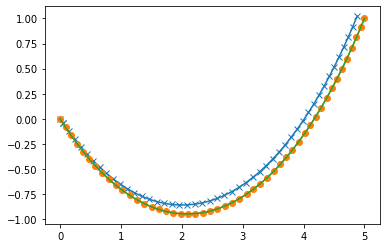

In [15]:
def diskretizacija(x, y, n, L): # x y are same size arrays, n is number of segments wanted, L is the total lenght of chain
    l = L / n
    nov_x = []
    nov_y = []
    konec = len(x) - 1

    i = 0
    j = 0
    k = 0

    while i < konec:
        while np.sqrt((x[j] - x[i])**2 + (y[j] - y[i])**2) < l and j < konec:
            j += 1
            
        
        nov_x.append(x[i])
        nov_y.append(y[i])
        
        i = j

    nov_x.append(x[-1])
    nov_y.append(y[-1])

    return np.array(nov_x), np.array(nov_y)


def xy_to_phi(x, y, n, L):
    l = L / n
    
    x_nov, y_nov = diskretizacija(x, y, n, L)
    phi = np.zeros(len(x_nov)-1)

    for i in range(len(phi)):
        dx = x_nov[i+1] - x_nov[i]
        dy = y_nov[i+1] - y_nov[i]
        phi[i] = np.arctan(dy / dx)

    return phi

n = 50
x_nov, y_nov = diskretizacija(x, y, n, L)
phi = xy_to_phi(x, y, n, L)
print(phi)
print(len(phi))
print(x_nov, y_nov)

plt.plot(x_iz_phi(phi, L), y_iz_phi(phi, L), marker='x')
plt.plot(x_nov, y_nov, marker='o')
plt.plot(x, y)
plt.show()

## Vse skupaj

In [16]:
def diskretizacija(x, y, n, L): # x y are same size arrays, n is number of segments wanted, L is the total lenght of chain
    l = L / n
    nov_x = []
    nov_y = []
    konec = len(x) - 1

    i = 0
    j = 0
    k = 0

    while i < konec:
        while np.sqrt((x[j] - x[i])**2 + (y[j] - y[i])**2) < l and j < konec:
            j += 1
            
        
        nov_x.append(x[i])
        nov_y.append(y[i])
        
        i = j

    nov_x.append(x[-1])
    nov_y.append(y[-1])

    return np.array(nov_x), np.array(nov_y)


def xy_to_phi(x, y, n, L):
    l = L / n
    
    x_nov, y_nov = diskretizacija(x, y, n, L)
    phi = np.zeros(len(x_nov)-1)

    for i in range(len(phi)):
        dx = x_nov[i+1] - x_nov[i]
        dy = y_nov[i+1] - y_nov[i]
        phi[i] = np.arctan(dy / dx)

    return phi



def falling_chain(P0, P1, L, n, t_final, r=0.001, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=13):
    
    d = abs(P0[0] - P1[0])
    h = abs(P0[1] - P1[1])

    if L <= np.sqrt(d**2 + h**2):
        print('Prekratka vrv')
        return None
    else:
        pass

    def catenary(a):
        return a * np.sinh(d/(2*a) + np.arctanh(h/L)) + a * np.sinh(d/(2*a) - np.arctanh(h/L)) - L

    a = fsolve(catenary, 1)

    d1 = a * (d/(2*a) + np.arctanh(h/L))
    d0 = d - d1

    if P1[1] >= P0[1]:
        xi = d0
        xf = d1

    elif P1[1] < P0[1]:
        xi = d1
        xf = d0


    x = np.linspace(-xi, xf, 500)
    y = np.zeros_like(x)

    y = a * np.cosh((x)/a)

    h_max = a * (math.cosh(d1 / a) - 1)



    phi = xy_to_phi(x, y, n, L)
    print(phi)
    
    omega = np.zeros_like(phi)
    alpha = np.zeros_like(phi)


    def cas_raz_cat(t, omega):
        phi = sol[0, t]
        n = len(phi)
        l = L / n
        mc = MC(phi)
        ms = MS(phi)
        q = qc(phi)

        inv = np.linalg.inv(mc)
        
        res = - np.dot(inv, np.dot(ms, np.square(omega))) - np.dot(inv, q)

        popravek = np.zeros_like(phi)
        for i in range(n):
            if i == 0:
                popravek[i] = r / (m*l**2) * (omega[i+1] - 2 * omega[i] + omega[i])
            elif i == n-1:
                popravek[i] = r / (m*l**2) * (omega[i] - 2 * omega[i] + omega[i-1])
            else:
                popravek[i] = r / (m*l**2) * (omega[i+1] - 2 * omega[i] + omega[i-1])

        return res + np.dot(inv, popravek)
    

    timespace = np.linspace(0, t_final, int(t_final / dt))

    sol = np.zeros([3, len(timespace), len(phi)])
    sol[0, 0] = phi
    sol[1, 0] = omega
    sol[2, 0] = alpha


    for t in range(len(timespace)-1):
        dt = timespace[t+1] - timespace[t]

        sol[0, t+1] = sol[0, t] + sol[1, t] * dt
        
        k1 = dt * cas_raz_cat(t, sol[1, t])
        k2 = dt * cas_raz_cat(t, sol[1, t] + 0.5 * k1)
        k3 = dt * cas_raz_cat(t+1, sol[1, t] + 0.5 * k2)
        k4 = dt * cas_raz_cat(t+1, sol[1, t] + k3)

        sol[1, t+1] = sol[1, t] + (k1 + 2.0 * (k2+k3) + k4) / 6.0

        sol[2, t+1] = (sol[1, t+1] - sol[1, t]) / dt


    if plot == True:
        cmap = plt.get_cmap('cool', len(timespace))
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(width, 6), sharex=True)

        axes.set_ylabel('$y$')


        freq = 25

        for i in range(len(timespace)//freq):
            x = x_iz_phi(sol[0, freq*i], L)
            y = y_iz_phi(sol[0, freq*i], L)
            axes.plot(x, y, color=cmap(freq*i))

            if i == 0:
                axes.plot(x[0], y[0], color='red', marker='o', label=r'$P_0$', linestyle='')
                axes.plot(x[-1], y[-1], color='blue', marker='o', label=r'$P_1$', linestyle='')
                print((x[-1], y[-1]))


        norm = matplotlib.colors.Normalize(vmin=0, vmax=t_final)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        fig.colorbar(sm, ax=axes, label=r'$t$')

        plt.xlabel('$x$')
        plt.legend()
        plt.gca().set_aspect('equal', adjustable='box')
        #plt.xlim(-1, 1)

        plt.savefig(f'grafi/falling_chain_P.{P1[0]}-{P1[1]}_L.{L}_n.{len(phi)}_t.{t_final}_r.{r}_m.{m}_g.{g}_dt.{round(dt, 4)}_freq.{freq}.pdf')
        plt.show()
        print(f'grafi/falling_chain_P.{P1[0]}-{P1[1]}_L.{L}_n.{len(phi)}_t.{t_final}_r.{r}_m.{m}_g.{g}_dt.{round(dt, 4)}_freq.{freq}.pdf')

    return sol

[-1.34015214 -1.32996252 -1.31933186 -1.30711619 -1.29311874 -1.27839844
 -1.26160823 -1.2424697  -1.22219195 -1.19915066 -1.17295725 -1.14323725
 -1.10948296 -1.07120843 -1.02553923 -0.97124556 -0.90690697 -0.83093568
 -0.74164553 -0.63393158 -0.50545613 -0.35895807 -0.19534323 -0.02184278
  0.15231776  0.3177601   0.46685075  0.59830294  0.71234277  0.80709121
  0.88509655  0.9512603   1.00716135  1.05422647  1.09572386  1.13225098
  1.1626908   1.18952632  1.21313818  1.23392214  1.25354178  1.27075663
  1.28585105  1.30020574  1.31385416  1.32576417  1.3361281   1.34311097]
(2.9692671611457957, 0.14712185086266658)


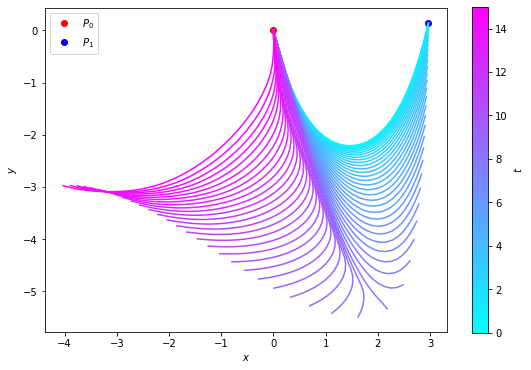

grafi/falling_chain_P.3.0-0.0_L.6_n.48_t.15_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf


In [17]:
P0 = np.array([0.0, 0.0])
P1 = np.array([1.0, -0.20])
P3 = np.array([3.0, -0.15])
P5 = np.array([5.0, -0.05])
P6 = np.array([5.99, 0.0])
P1_v = np.array([3.0, -2.0])
P2_v = np.array([3.0, 0.0])
P3_v = np.array([3.0, 2.0])
P4_v = np.array([3.0, 4.0])

L = 6
n = 50
t_final = 15


fc = falling_chain(P0, P2_v, L, n, t_final, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, width=9)

#### Hitrost ob koncu vrvi - horizonatalno spreminjanje položaja

[-1.52769957 -1.52567083 -1.52354666 -1.52132258 -1.51859885 -1.51529776
 -1.51178812 -1.50805682 -1.50408991 -1.4993333  -1.49364254 -1.48749959
 -1.4801871  -1.47146637 -1.4610866  -1.44776116 -1.43070335 -1.40884656
 -1.37932933 -1.33753917 -1.27385088 -1.16453198 -0.94709622 -0.43035326
  0.41100799  0.93975687  1.16241517  1.27228435  1.3363018   1.37831066
  1.40798344  1.42995589  1.44710422  1.46050051  1.47093554  1.47970274
  1.48770217  1.49440944  1.50004373  1.50475313  1.50868065  1.5123749
  1.51584967  1.51911796  1.52181463  1.52401661  1.5254258 ]
(1.0192188530594024, -0.06681463774899374)


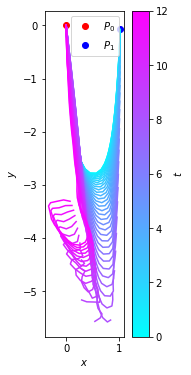

grafi/falling_chain_P.1.0--0.2_L.6_n.47_t.12_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf
[-1.34567755 -1.33573015 -1.32535168 -1.31342514 -1.29975803 -1.28538395
 -1.27026944 -1.25303204 -1.23338717 -1.212577   -1.18893603 -1.16206824
 -1.13159287 -1.09502454 -1.05348228 -1.00636875 -0.95041362 -0.88419071
 -0.80612246 -0.71130763 -0.59720287 -0.46569637 -0.3165709  -0.15112302
  0.02300677  0.19644166  0.35996564  0.50636161  0.634734    0.74235365
  0.83156144  0.90746047  0.97173682  1.02597757  1.0716022   1.10983949
  1.14356112  1.17325259  1.19942108  1.22244065  1.24269949  1.26182036
  1.27859525  1.29330228  1.30728724  1.31949213  1.33011352  1.33727033]
(2.970314412923799, -0.02325433470061959)


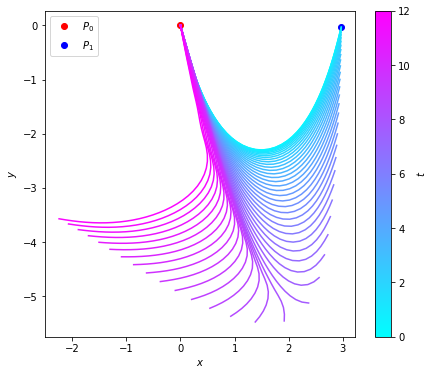

grafi/falling_chain_P.3.0--0.15_L.6_n.48_t.12_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf
[-0.90133018 -0.87985864 -0.8578147  -0.83376753 -0.80758529 -0.78066626
 -0.75300976 -0.72461731 -0.69386053 -0.66060477 -0.62646681 -0.59146406
 -0.55381176 -0.51339631 -0.47203841 -0.42978843 -0.38473298 -0.33682003
 -0.28808951 -0.23864499 -0.18859846 -0.13806927 -0.08718279 -0.03606897
  0.01513929  0.06630788  0.1173032   0.1679939   0.21825253  0.26795712
  0.31699253  0.36525164  0.41067416  0.4533038   0.49506618  0.53590767
  0.575782    0.61289831  0.64737634  0.68097843  0.71368988  0.74392405
  0.77181842  0.79897555  0.82539545  0.84966608  0.871919    0.89225412]
(4.890372087242776, 0.009635573984817694)


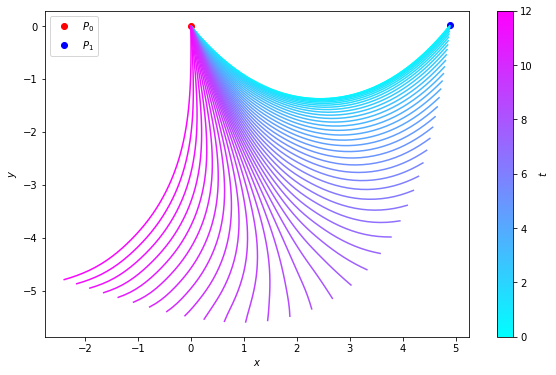

grafi/falling_chain_P.5.0--0.05_L.6_n.48_t.12_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf
[-0.09789653 -0.0939046  -0.08991117 -0.08591631 -0.08192006 -0.07792251
 -0.0739237  -0.06992372 -0.06592261 -0.06192044 -0.05791728 -0.05391319
 -0.04990824 -0.04590248 -0.04189599 -0.03788882 -0.03388105 -0.02987273
 -0.02586393 -0.02185472 -0.01784515 -0.0138353  -0.00982522 -0.00581499
 -0.00180466  0.0022057   0.00621602  0.01022624  0.01423629  0.01824612
  0.02225566  0.02626483  0.03027359  0.03428185  0.03828957  0.04229667
  0.04630309  0.05030877  0.05431364  0.05831764  0.0623207   0.06632277
  0.07032377  0.07432364  0.07832232  0.08231975  0.08631586  0.09031058
  0.09430387  0.09809608]
(5.810842558244462, 0.007027761108779628)


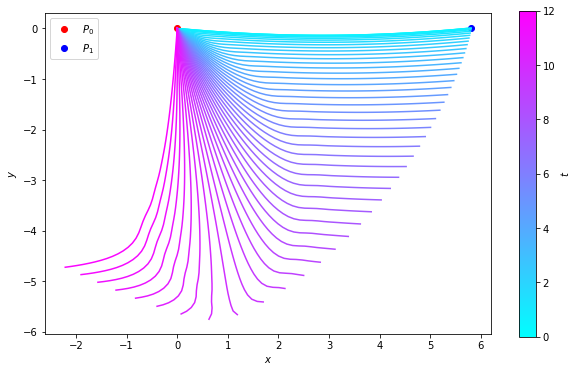

grafi/falling_chain_P.5.99-0.0_L.6_n.50_t.12_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf


In [18]:
P0 = np.array([0.0, 0.0])
P1 = np.array([1.0, -0.20])
P3 = np.array([3.0, -0.15])
P5 = np.array([5.0, -0.05])
P6 = np.array([5.99, 0.0])


L = 6
n = 50
t_final = 12
dt = 0.01
tspace = np.linspace(0, t_final, int(t_final / dt))


fc1 = falling_chain(P0, P1, L, n, t_final, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=3)
fc3 = falling_chain(P0, P3, L, n, t_final, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=7)
fc5 = falling_chain(P0, P5, L, n, t_final, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=10)
fc6 = falling_chain(P0, P6, L, n, t_final, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=10)

In [19]:
def hitrost_pos(sol, dt=0.01):
    t_final = len(sol[0])

    x = np.zeros([t_final, len(sol[0, 0])+1])
    y = np.zeros([t_final, len(sol[0, 0])+1])
    vx = np.zeros([t_final, len(sol[0, 0])+1])
    vy = np.zeros([t_final, len(sol[0, 0])+1])

    x[0] = x_iz_phi(sol[0, 0], L)
    y[0] = y_iz_phi(sol[0, 0], L)

    for i in range(t_final-1):
        x[i+1] = x_iz_phi(sol[0, i], L)
        y[i+1] = y_iz_phi(sol[0, i], L)

        vx[i] = (x[i+1] - x[i]) / dt
        vy[i] = (y[i+1] - y[i]) / dt


    return x, y, vx, vy

x1, y1, vx1, vy1 = hitrost_pos(fc1)
x3, y3, vx3, vy3 = hitrost_pos(fc3)
x5, y5, vx5, vy5 = hitrost_pos(fc5)
x6, y6, vx6, vy6 = hitrost_pos(fc6)

v1 = np.sqrt(vx1**2 + vy1**2)
v3 = np.sqrt(vx3**2 + vy3**2)
v5 = np.sqrt(vx5**2 + vy5**2)
v6 = np.sqrt(vx6**2 + vy6**2)

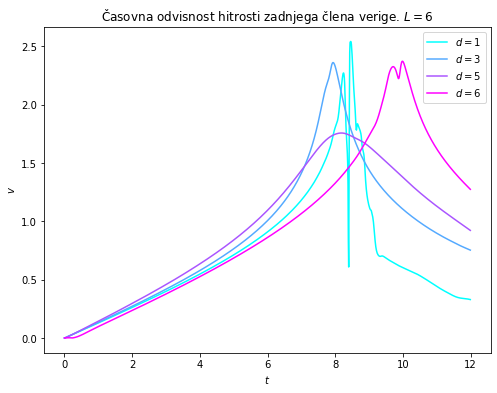

In [20]:
cmap = plt.get_cmap('cool', 4)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)
clen = -1

axes.plot(tspace[:-1], v1[:-1, clen], color=cmap(0), label=f'$d={1}$')
axes.plot(tspace[:-1], v3[:-1, clen], color=cmap(1), label=f'$d={3}$')
axes.plot(tspace[:-1], v5[:-1, clen], color=cmap(2), label=f'$d={5}$')
axes.plot(tspace[:-1], v6[:-1, clen], color=cmap(3), label=f'$d={6}$')


axes.set_ylabel('$v$')
plt.xlabel('$t$')
plt.legend()
plt.title('Časovna odvisnost hitrosti zadnjega člena verige. $L=6$')
plt.savefig(f'grafi/hitrost_siroko.pdf')

plt.show()

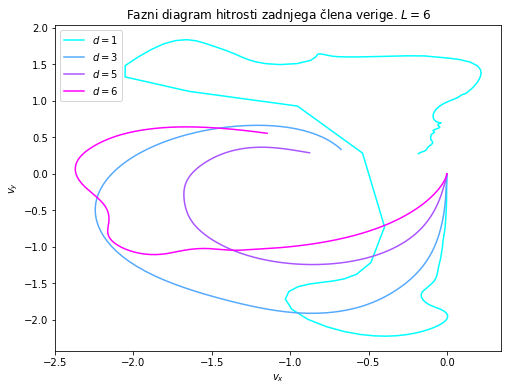

In [21]:
cmap = plt.get_cmap('cool', 4)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)
clen = -1

axes.plot(vx1[:-1, clen], vy1[:-1, clen], color=cmap(0), label=f'$d={1}$')
axes.plot(vx3[:-1, clen], vy3[:-1, clen], color=cmap(1), label=f'$d={3}$')
axes.plot(vx5[:-1, clen], vy5[:-1, clen], color=cmap(2), label=f'$d={5}$')
axes.plot(vx6[:-1, clen], vy6[:-1, clen], color=cmap(3), label=f'$d={6}$')

axes.set_ylabel('$v_y$')
plt.xlabel('$v_x$')
plt.legend()
plt.title('Fazni diagram hitrosti zadnjega člena verige. $L=6$')
plt.savefig(f'grafi/hitrost_siroko_xy.pdf')

plt.show()

#### Hitrost ob koncu vrvi - vertikalno spreminjanje položaja

[-1.39018571 -1.38412066 -1.37785439 -1.37138047 -1.3638461  -1.3551392
 -1.34607192 -1.33663011 -1.32679919 -1.31552548 -1.30263677 -1.28911374
 -1.27492778 -1.25878824 -1.24044283 -1.22106052 -1.19909982 -1.17421175
 -1.14606162 -1.11419597 -1.07818236 -1.03535802 -0.98462468 -0.92717262
 -0.8622933  -0.78334972 -0.68803135 -0.57765538 -0.45124337 -0.30472218
 -0.14280348  0.02297458  0.18812355  0.34429359  0.48481921  0.60884313
  0.71673883  0.80673313  0.88114615  0.94454834  0.99835844  1.04597151
  1.08801781  1.12336354  1.15462868  1.18224123  1.20664891]
(3.000238824886932, -1.8789590758755652)


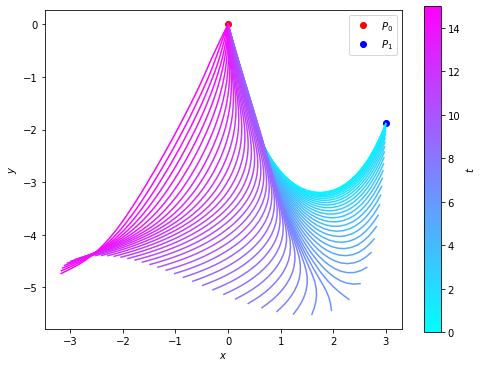

grafi/falling_chain_P.3.0--2.0_L.6_n.47_t.15_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf
[-1.34015214 -1.32996252 -1.31933186 -1.30711619 -1.29311874 -1.27839844
 -1.26160823 -1.2424697  -1.22219195 -1.19915066 -1.17295725 -1.14323725
 -1.10948296 -1.07120843 -1.02553923 -0.97124556 -0.90690697 -0.83093568
 -0.74164553 -0.63393158 -0.50545613 -0.35895807 -0.19534323 -0.02184278
  0.15231776  0.3177601   0.46685075  0.59830294  0.71234277  0.80709121
  0.88509655  0.9512603   1.00716135  1.05422647  1.09572386  1.13225098
  1.1626908   1.18952632  1.21313818  1.23392214  1.25354178  1.27075663
  1.28585105  1.30020574  1.31385416  1.32576417  1.3361281   1.34311097]
(2.9692671611457957, 0.14712185086266658)


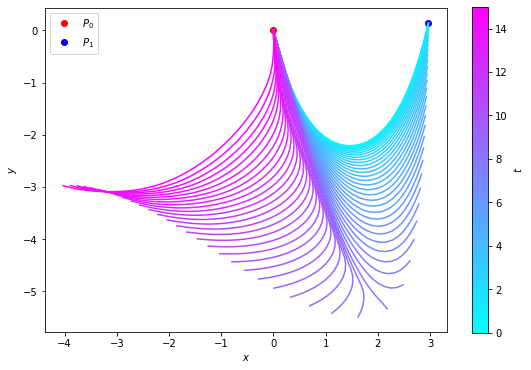

grafi/falling_chain_P.3.0-0.0_L.6_n.48_t.15_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf
[-1.20664891 -1.18224123 -1.15462868 -1.12336354 -1.08801781 -1.04802224
 -1.0028413  -0.94939966 -0.88641377 -0.81246259 -0.72605115 -0.62240925
 -0.49946643 -0.3598966  -0.2044303  -0.03959314  0.12632742  0.28882388
  0.44003642  0.570679    0.68159686  0.77744678  0.85962516  0.92717262
  0.98462468  1.03535802  1.07818236  1.11419597  1.14606162  1.17421175
  1.19909982  1.22106052  1.24044283  1.25878824  1.27492778  1.28911374
  1.30263677  1.31552548  1.32679919  1.33663011  1.34607192  1.3551392
  1.3638461   1.37138047  1.37785439  1.38412066  1.39018571]
(2.986167058097826, 1.9822184289601157)


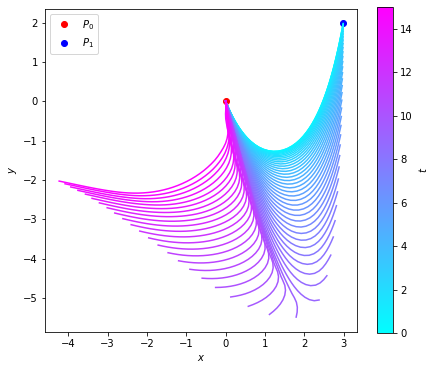

grafi/falling_chain_P.3.0-2.0_L.6_n.47_t.15_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf
[-0.69028869 -0.6055162  -0.50983148 -0.40280229 -0.28446012 -0.15866521
 -0.03028626  0.09859394  0.22585186  0.34644038  0.45620393  0.55487573
  0.64270181  0.72271554  0.79517351  0.85843971  0.91345689  0.96113083
  1.0022968   1.03935566  1.07266338  1.10261034  1.1294953   1.15364006
  1.17528661  1.19469367  1.21319165  1.22973222  1.24451229  1.2586738
  1.27128381  1.28248994  1.29328804  1.30369178  1.31371446  1.32257373
  1.3303717   1.33792928  1.34525348  1.35235111  1.35922884  1.36589316
  1.37171081  1.37674765  1.38165862  1.38644676  1.3905358 ]
(2.9323880269805764, 3.9608670209801238)


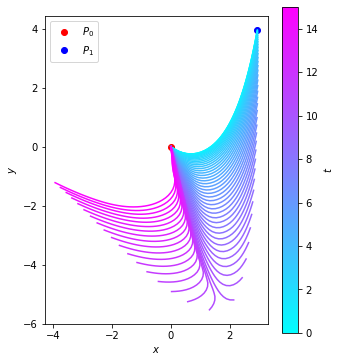

grafi/falling_chain_P.3.0-4.0_L.6_n.47_t.15_r.0.0005_m.0.2_g.1_dt.0.01_freq.25.pdf


In [22]:
P0 = np.array([0.0, 0.0])
P1_v = np.array([3.0, -2.0])
P2_v = np.array([3.0, 0.0])
P3_v = np.array([3.0, 2.0])
P4_v = np.array([3.0, 4.0])

L_v = 6
n_v = 50
t_final_v = 15
dt = 0.01
tspace_v = np.linspace(0, t_final_v, int(t_final_v / dt))
w_v = 8

vert1 = falling_chain(P0, P1_v, L_v, n_v, t_final_v, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=8)
vert2 = falling_chain(P0, P2_v, L_v, n_v, t_final_v, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=9)
vert3 = falling_chain(P0, P3_v, L_v, n_v, t_final_v, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=7)
vert4 = falling_chain(P0, P4_v, L_v, n_v, t_final_v, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=True, width=5)

In [23]:
def hitrost_pos(sol, dt=0.01):
    t_final = len(sol[0])

    x = np.zeros([t_final, len(sol[0, 0])+1])
    y = np.zeros([t_final, len(sol[0, 0])+1])
    vx = np.zeros([t_final, len(sol[0, 0])+1])
    vy = np.zeros([t_final, len(sol[0, 0])+1])

    x[0] = x_iz_phi(sol[0, 0], L)
    y[0] = y_iz_phi(sol[0, 0], L)

    for i in range(t_final-1):
        x[i+1] = x_iz_phi(sol[0, i], L)
        y[i+1] = y_iz_phi(sol[0, i], L)

        vx[i] = (x[i+1] - x[i]) / dt
        vy[i] = (y[i+1] - y[i]) / dt


    return x, y, vx, vy

x1_v, y1_v, vx1_v, vy1_v = hitrost_pos(vert1)
x2_v, y2_v, vx2_v, vy2_v = hitrost_pos(vert2)
x3_v, y3_v, vx3_v, vy3_v = hitrost_pos(vert3)
x4_v, y4_v, vx4_v, vy4_v = hitrost_pos(vert4)

v1_v = np.sqrt(vx1_v**2 + vy1_v**2)
v2_v = np.sqrt(vx2_v**2 + vy2_v**2)
v3_v = np.sqrt(vx3_v**2 + vy3_v**2)
v4_v = np.sqrt(vx4_v**2 + vy4_v**2)

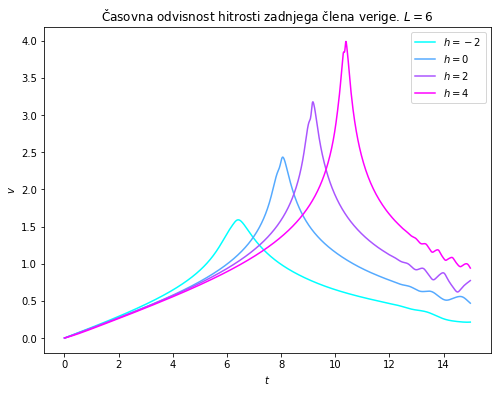

In [24]:
tspace_v = np.linspace(0, t_final_v, int(t_final_v / dt))

cmap = plt.get_cmap('cool', 4)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)
clen = -1

axes.plot(tspace_v[:-1], v1_v[:-1, clen], color=cmap(0), label=f'$h={-2}$')
axes.plot(tspace_v[:-1], v2_v[:-1, clen], color=cmap(1), label=f'$h={0}$')
axes.plot(tspace_v[:-1], v3_v[:-1, clen], color=cmap(2), label=f'$h={2}$')
axes.plot(tspace_v[:-1], v4_v[:-1, clen], color=cmap(3), label=f'$h={4}$')


axes.set_ylabel('$v$')
plt.xlabel('$t$')
plt.legend()
plt.title('Časovna odvisnost hitrosti zadnjega člena verige. $L=6$')
plt.savefig(f'grafi/hitrost_visoko.pdf')

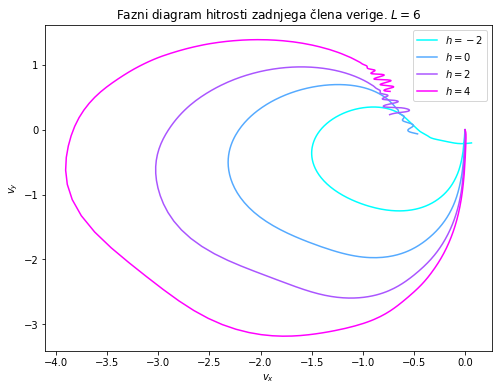

In [25]:
cmap = plt.get_cmap('cool', 4)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), sharex=True)
clen = -1

axes.plot(vx1_v[:-1, clen], vy1_v[:-1, clen], color=cmap(0), label=f'$h={-2}$')
axes.plot(vx2_v[:-1, clen], vy2_v[:-1, clen], color=cmap(1), label=f'$h={0}$')
axes.plot(vx3_v[:-1, clen], vy3_v[:-1, clen], color=cmap(2), label=f'$h={2}$')
axes.plot(vx4_v[:-1, clen], vy4_v[:-1, clen], color=cmap(3), label=f'$h={4}$')

axes.set_ylabel('$v_y$')
plt.xlabel('$v_x$')
plt.legend()
plt.title('Fazni diagram hitrosti zadnjega člena verige. $L=6$')
plt.savefig(f'grafi/hitrost_visoko_xy.pdf')

plt.show()

#### Graf $v_{max}(d)$

In [26]:
k = 20
start = 5
pos = np.linspace(0, L, k)
v_max = np.zeros(k-start-1)
t_final = 12

for i in range(start, k-1):
    pf = np.array([pos[i], 0.0])
    graf = falling_chain(P0, pf, L, n, t_final, r=0.0005, m=0.2, g=1, dt=0.01, freq=25, plot=False)
    x, y, vx, vy = hitrost_pos(graf)
    v = np.sqrt(vx**2 + vy**2)
    v_max[i-start] = np.max(v)
    print(i)

# tole se racuna ene 20 minut tko da ce se da cim manjkrat

[-1.48636287 -1.48193838 -1.47728268 -1.47238379 -1.46722914 -1.46111464
 -1.45389036 -1.44619256 -1.43715144 -1.42653177 -1.41507457 -1.40165733
 -1.38590856 -1.36744481 -1.34431485 -1.31539705 -1.27922782 -1.23183804
 -1.16717647 -1.07317847 -0.92954953 -0.70414931 -0.34736541  0.1223412
  0.54926785  0.83669447  1.01561983  1.1307071   1.20772478  1.26227082
  1.3038804   1.33553925  1.35955165  1.3799585   1.39729837  1.41208577
  1.42468208  1.43543705  1.44459352  1.45238963  1.45970626  1.46589898
  1.47111961  1.47608124  1.48079659  1.48527779  1.48795636]


KeyboardInterrupt: 

[2.42942458 2.43502714 2.51668744 2.48221035 2.41976721 2.37250062
 2.30155712 2.16416214 2.0407195  1.94228152 1.84044295 1.77161685
 1.79286495 1.97377082]
grafi/vmax_od_d_s-1.5789473684210527_f-6.0_k-14.pdf


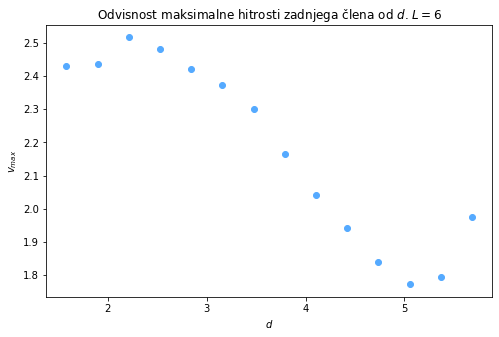

In [ ]:
cmap = plt.get_cmap('cool', 4)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), sharex=True)
clen = -1

v_max = np.array([2.42942458, 2.43502714, 2.51668744, 2.48221035, 2.41976721, 2.37250062, 2.30155712, 2.16416214, 2.0407195,  1.94228152, 1.84044295, 1.77161685, 1.79286495, 1.97377082])

axes.plot(pos[start:-1], v_max, color=cmap(1), linestyle='', marker='o')


axes.set_ylabel('$v_{max}$')
plt.xlabel('$d$')
#plt.legend()
plt.title('Odvisnost maksimalne hitrosti zadnjega člena od $d$. $L=6$')
plt.savefig(f'grafi/vmax_od_d_s-{pos[start]}_f-{pos[-1]}_k-{len(v_max)}.pdf')
print(v_max)

print(f'grafi/vmax_od_d_s-{pos[start]}_f-{pos[-1]}_k-{len(v_max)}.pdf')


### Vertikalni zacetni pogoj - gor-dol al pa sam na gor

[-1.3099232  -1.07541692  0.0121809   1.08548869  1.31534755  1.39802655
  1.44034648  1.4662229   1.48374123  1.49608097  1.50519748  1.5123143
  1.51826624  1.5232437   1.527424    1.5309282   1.53387128  1.53659719
  1.53887527  1.54077492  1.54256154  1.54424187  1.54582222  1.54712606
  1.54819067  1.54920741  1.55017842  1.55110576  1.5519914   1.55283721
  1.55364498  1.55428949  1.55478824  1.55527193  1.55574101  1.55619591
  1.55663707  1.55706489  1.5574798   1.55788216  1.55827237  1.55865079
  1.55901778  1.55937368  1.55971882  1.56005354  1.56037814  1.56069294
  1.56099822  1.56129428  1.56158139]


<ipython-input-114-ae86c7fd620d>:96: RuntimeWarning: overflow encountered in square
  res = - np.dot(inv, np.dot(ms, np.square(omega))) - np.dot(inv, q)


(0.4341737538065902, 5.4628703740793645)


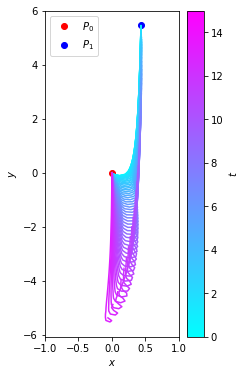

grafi/falling_chain_P.1.0-5.5_L.6_n.51_t.15_r.0.001_m.0.2_g.1_dt.0.01_freq.25.pdf


In [ ]:
P0 = np.array([0.0, 0.0])
P1 = np.array([1.0, 5.5])
n = 25

vert_up = falling_chain(P0, P1, 6, n, 15, r=0.001, width=3, freq=100)

In [ ]:
n = 50 # število členov
k = 1 # število členov pri obratu
t_final = 12
dt = 0.01
L = 6
r = 0.001

phi = np.zeros(n)
for i in range(n):
    if i < (n-k)/2:
        phi[i] = - np.pi / 2
    elif i > (n+k)/2:
        phi[i] = np.pi / 2
    else:
        phi[i] = -np.pi / 2 + np.pi/k * (i - (n-k)/2)

print(phi)
#plt.plot(x_iz_phi(phi, L), y_iz_phi(phi, L), marker='x')


omega = np.zeros_like(phi)
alpha = np.zeros_like(phi)


def cas_raz_cat(t, omega):
    phi = sol[0, t]
    n = len(phi)
    l = L / n
    mc = MC(phi)
    ms = MS(phi)
    q = qc(phi)

    inv = np.linalg.inv(mc)
    
    res = - np.dot(inv, np.dot(ms, np.square(omega))) - np.dot(inv, q)

    popravek = np.zeros_like(phi)
    for i in range(n):
        if i == 0:
            popravek[i] = r / (m*l**2) * (omega[i+1] - 2 * omega[i] + omega[i])
        elif i == n-1:
            popravek[i] = r / (m*l**2) * (omega[i] - 2 * omega[i] + omega[i-1])
        else:
            popravek[i] = r / (m*l**2) * (omega[i+1] - 2 * omega[i] + omega[i-1])

    return res + np.dot(inv, popravek)


timespace = np.linspace(0, t_final, int(t_final / dt))

sol = np.zeros([3, len(timespace), len(phi)])
sol[0, 0] = phi
sol[1, 0] = omega
sol[2, 0] = alpha


for t in range(len(timespace)-1):
    dt = timespace[t+1] - timespace[t]

    sol[0, t+1] = sol[0, t] + sol[1, t] * dt
    
    k1 = dt * cas_raz_cat(t, sol[1, t])
    k2 = dt * cas_raz_cat(t, sol[1, t] + 0.5 * k1)
    k3 = dt * cas_raz_cat(t+1, sol[1, t] + 0.5 * k2)
    k4 = dt * cas_raz_cat(t+1, sol[1, t] + k3)

    sol[1, t+1] = sol[1, t] + (k1 + 2.0 * (k2+k3) + k4) / 6.0

    sol[2, t+1] = (sol[1, t+1] - sol[1, t]) / dt

[-1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633
 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633
 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633
 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633
 -1.57079633  0.          1.57079633  1.57079633  1.57079633  1.57079633
  1.57079633  1.57079633  1.57079633  1.57079633  1.57079633  1.57079633
  1.57079633  1.57079633  1.57079633  1.57079633  1.57079633  1.57079633
  1.57079633  1.57079633  1.57079633  1.57079633  1.57079633  1.57079633
  1.57079633  1.57079633]


<ipython-input-127-3cf86498a62d>:35: RuntimeWarning: overflow encountered in square
  res = - np.dot(inv, np.dot(ms, np.square(omega))) - np.dot(inv, q)


(0.1200000000000005, -0.06000000000000005)


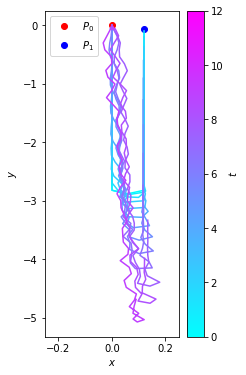

grafi/vertfall_L.6_n.50_k.1_t.12_r.0.001_m.3_g.1_dt.0.01_freq.75.pdf


In [ ]:
cmap = plt.get_cmap('cool', len(timespace))
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 6), sharex=True)

axes.set_ylabel('$y$')


freq = 75

for i in range(len(timespace)//freq):
    x = x_iz_phi(sol[0, freq*i], L)
    y = y_iz_phi(sol[0, freq*i], L)
    axes.plot(x, y, color=cmap(freq*i))

    if i == 0:
        axes.plot(x[0], y[0], color='red', marker='o', label=r'$P_0$', linestyle='')
        axes.plot(x[-1], y[-1], color='blue', marker='o', label=r'$P_1$', linestyle='')
        print((x[-1], y[-1]))


norm = matplotlib.colors.Normalize(vmin=0, vmax=t_final)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes, label=r'$t$')

plt.xlabel('$x$')
plt.legend()
#plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-0.25, 0.25)

plt.savefig(f'grafi/vertfall_L.{L}_n.{len(phi)}_k.{k}_t.{t_final}_r.{r}_m.{m}_g.{g}_dt.{round(dt, 4)}_freq.{freq}.pdf')
plt.show()
print(f'grafi/vertfall_L.{L}_n.{len(phi)}_k.{k}_t.{t_final}_r.{r}_m.{m}_g.{g}_dt.{round(dt, 4)}_freq.{freq}.pdf')